### Implementation of Neural Network from scratch

In [215]:
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]

In [216]:
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]

In [262]:
c=[0,1,1,1,1,1,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,1]

In [264]:
#creating Labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]
   

In [266]:
import numpy as np
import matplotlib.pyplot as plt

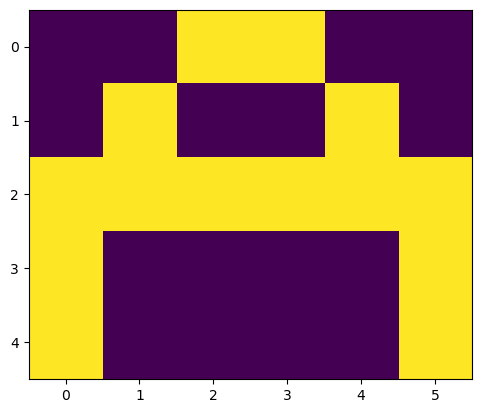

In [302]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [270]:
#convert data labels into numpy array
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y=np.array(y)
print(x,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [272]:
#Avtivation function 
# ~input layer-(1,30)
# ~hidden layer-(1,5)
# ~output layer-(3,3)

In [274]:
def sigmoid(x):
    return(1/(1+np.exp(-x))) #formula for sigmoid

In [276]:
#forward propagation
def f_forward(x,w1,w2):
    #hidden layer 
    z1=x.dot(w1)
    a1=sigmoid(z1)
    #output layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    return(a2)

In [278]:
# initialize the weights
def generate_wt(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x,y))

In [280]:
#function for loss
def loss(out,y):
    s=(np.square(out-y))
    s=np.sum(s)/len(y)
    return(s)

In [282]:
#back propagation
def back_prop(x,y,w1,w2,alpha):
    #hidden layer
    z1=x.dot(w1)
    a1=sigmoid(z1)
    
    #output layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    d2=(a2-y)
    d1=np.multiply((w2.dot((d2.transpose()))).transpose(),(np.multiply(a1,1-a1)))
    
    #gradient
    
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)
    w1=w1-(alpha*(w1_adj))
    w2=w2-(alpha*(w2_adj))
    return(w1,w2)

In [284]:
#training 
def train(x,y,w1,w2,alpha=0.01,epoch=10):
    acc=[]
    losses=[]
    for j in range(epoch):
        l=[]
        for i in range(len(x)):
            out=f_forward(x[i],w1,w2)
            l.append(loss(out, y[i]))  
            w1,w2=back_prop(x[i],y[i],w1,w2,alpha)
        print("Epochs:",j+1,"acc",(1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losses.append(sum(l)/len(x))
    return(acc,losses,w1,w2)

In [286]:
#prediction
def predict(x,w1,w2):
    out=f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(out[0])):
        if(maxm<out[0][i]):
            maxm=out[0][i]
            k=i
    if(k==0):
            print("Image is of letter A")
    elif(k==1):
            print("Image is of letter B")
    else:
            print("Image is of letter C")
    #visualise
    plt.imshow(x.reshape(5,6))
    plt.show()
    

In [288]:
#initializing the weights
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1,"\n",w2)

[[ 2.21035946 -0.14033378  0.33397802 -0.82181063  0.38175507]
 [ 0.50620305 -1.85703734 -1.90138614 -1.65745328  0.851333  ]
 [ 1.16599228 -0.21160753  1.10302215 -1.37484001 -1.76065829]
 [-0.75352712  1.97631344 -0.71515925 -1.73422614  0.55070558]
 [ 0.51793004 -1.06340291  0.0828648  -2.14938847 -0.21857118]
 [ 1.18078395 -1.00020663  0.9904197  -1.5816937   0.75372385]
 [-0.48214231  0.07436756  0.1034226   0.50908067 -0.25662526]
 [ 0.99584648  1.26922135 -0.09200943  0.27928373  1.45323069]
 [-0.12570423 -1.5229221  -1.35738064 -0.70161577 -1.64067093]
 [ 1.76201465 -0.23727624  1.60624047  1.0254313   0.89588077]
 [-0.46493118  0.65604626  0.60905298  0.88009154 -1.31127737]
 [ 0.13322955 -0.78681544 -1.63956153 -0.77935605  0.25849067]
 [-1.03998231 -0.91833169  0.9162995   1.07593576 -0.23360571]
 [-1.77015903 -0.52972776 -0.65070949 -0.09028474  0.67396344]
 [ 0.01882538 -0.50005763  1.59056508 -1.12637937  0.57253483]
 [ 0.47435351  1.22930495 -1.70804583  0.80155452  0.97

In [290]:
acc,loss,w1,w2=train(x,y,w1,w2,0.1,100)

Epochs: 1 acc 70.83556999292824
Epochs: 2 acc 72.82379889150646
Epochs: 3 acc 74.71111957823591
Epochs: 4 acc 76.40982653542943
Epochs: 5 acc 77.90370373970677
Epochs: 6 acc 79.2183927786222
Epochs: 7 acc 80.3903140859586
Epochs: 8 acc 81.45219247480388
Epochs: 9 acc 82.42970750732238
Epochs: 10 acc 83.34198120370334
Epochs: 11 acc 84.20265704611661
Epochs: 12 acc 85.02077323497517
Epochs: 13 acc 85.80148260619073
Epochs: 14 acc 86.54683120860076
Epochs: 15 acc 87.25670827324628
Epochs: 16 acc 87.92990233552597
Epochs: 17 acc 88.56507038418313
Epochs: 18 acc 89.16142873180178
Epochs: 19 acc 89.71908557305596
Epochs: 20 acc 90.23906359097677
Epochs: 21 acc 90.72313072085936
Epochs: 22 acc 91.17355732183412
Epochs: 23 acc 91.59288042877985
Epochs: 24 acc 91.98371403637556
Epochs: 25 acc 92.34861488599502
Epochs: 26 acc 92.68999785667381
Epochs: 27 acc 93.01008963758343
Epochs: 28 acc 93.31090924953669
Epochs: 29 acc 93.59426600803845
Epochs: 30 acc 93.86176797920275
Epochs: 31 acc 94.114

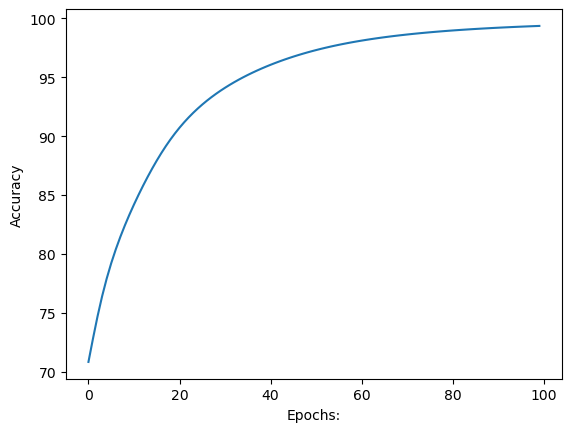

In [292]:
plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs:")
plt.show()

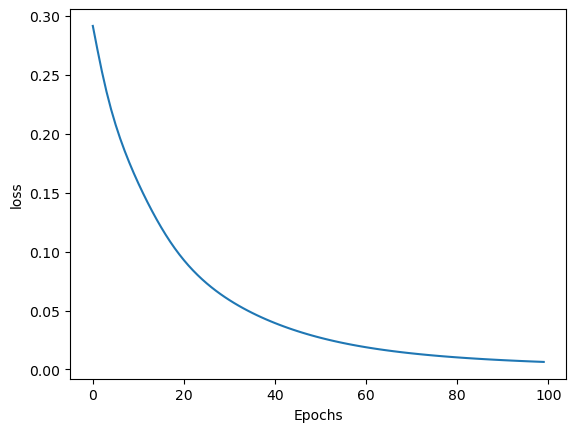

In [294]:
# plot loss
plt.plot(loss)
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

In [296]:
print(w1,"\n",w2)

[[ 2.21035946 -0.14033378  0.33397802 -0.82181063  0.38175507]
 [ 0.53439536 -1.86448493 -1.66706699 -1.67503199  0.75584692]
 [ 1.05257797 -0.12854023  1.33818901 -1.0994316  -1.95749894]
 [-0.86694144  2.05938075 -0.47999239 -1.45881772  0.35386494]
 [ 0.54612236 -1.0708505   0.31718395 -2.16696717 -0.31405726]
 [ 1.18912492 -1.0172885   1.86064896 -1.76464674 -0.03532178]
 [-0.48214231  0.07436756  0.1034226   0.50908067 -0.25662526]
 [ 0.88243217  1.35228866  0.14315743  0.55469215  1.25639004]
 [-0.12570423 -1.5229221  -1.35738064 -0.70161577 -1.64067093]
 [ 1.76201465 -0.23727624  1.60624047  1.0254313   0.89588077]
 [-0.58668647  0.75619543 -0.02600941  1.338453   -0.71907239]
 [ 0.13322955 -0.78681544 -1.63956153 -0.77935605  0.25849067]
 [-1.18158894 -0.8278168   0.91714722  1.36892288 -0.33496028]
 [-1.88357335 -0.44666045 -0.41554262  0.18512368  0.4771228 ]
 [-0.10292991 -0.39990846  0.95550269 -0.66801792  1.16473982]
 [ 0.35259822  1.32945413 -2.34310822  1.25991597  1.56

Image is of letter C


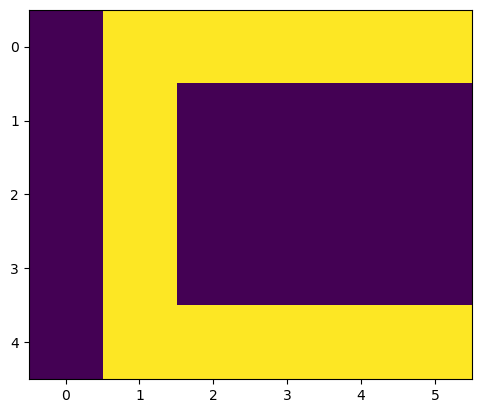

In [298]:
predict(x[2],w1,w2)